In [1]:
from __future__ import division, print_function

import copy
import io
import json
import os
import sys
import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from PIL import Image

from money_counter import constants, data, engine, models, prediction, utils

In [3]:
# Create a predictor
model, model_name = models.get_fasterrcnn_pretrained() 
model_state = torch.load(f'{constants.MODEL_FINAL_DIR}/{model_name}.pth')

model.load_state_dict(model_state['model_state_dict'])

predictor = prediction.Predictor(model, model_name)

In [4]:
# Load the image
image_path = "C:\\Users\\heavy\\OneDrive\\Desktop\\localhost_3000_.png"

# open image 
image = Image.open(image_path)


In [5]:
result = predictor.predict(image)

result.keys()

for score in result['scores']:
    print('score:', score.item())


score: 0.22879691421985626
score: 0.11112610995769501
score: 0.09539259970188141


In [6]:
# create a inverted map of the class index to the class name
label_map = {idx: class_name for idx, class_name in enumerate(constants.CLASSES)}
label_map

{0: 'Background', 1: 'Unknown', 2: '5', 3: '10', 4: '25', 5: '50', 6: '100'}

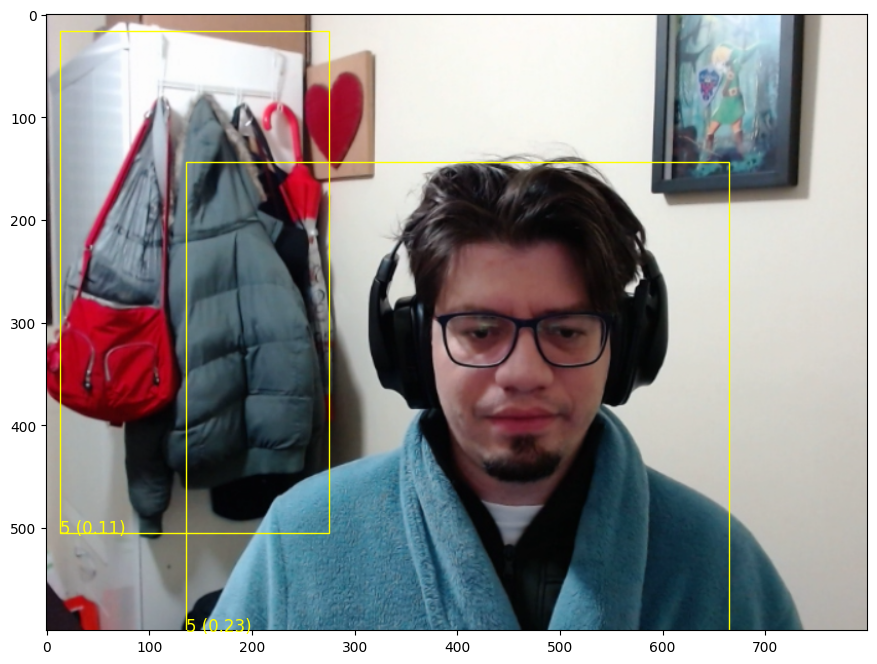

In [7]:
from money_counter.validation_utils import render_image_and_boxes

# convert pil image to tensor
image_t = torchvision.transforms.functional.to_tensor(image) # type: ignore
render_image_and_boxes(image_t, label_map, predicted=result, min_score=0.1)

